In [56]:
!git clone https://github.com/ChenaoB/Database

fatal: destination path 'Database' already exists and is not an empty directory.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("/content/Database/DataLeastSquareClasificationtTwoClassOutliers.csv")

Train = df.sample(frac = 0.8, random_state=39)
Test = df.drop(Train.index)

"""
Tengo 2 entradas: X1 X2
Tengo 2 tags: 1, -1
"""
print(Train)

           X1        X2  Y
37   1.503395  1.563814 -1
26  -0.587718 -0.803617 -1
42   0.002065 -0.724401 -1
93  -0.881775  0.396641  1
102  7.492510 -7.345252 -1
..        ...       ... ..
97  -0.021437  1.472850  1
100  7.195957 -7.052825 -1
86  -2.073889 -0.909901  1
84   0.215368  2.120182  1
36  -0.291662 -0.666293 -1

[88 rows x 3 columns]


In [59]:
# Construcción de matrices

# Esto es más bien opcional
YTrain = np.zeros((Train.shape[0], 1))
YTest = np.zeros((Test.shape[0], 1))

YTrain = Train["Y"].values
YTest = Test["Y"].values

XTrain = np.zeros((Train.shape[0], 2 + 1))
XTest = np.zeros((Test.shape[0], 2 + 1))

XTrain[:, 0:2] = Train[["X1", "X2"]].values
XTrain[:, 2] = np.ones(Train.shape[0])

XTest[:, 0:2] = Test[["X1", "X2"]].values
XTest[:, 2] = np.ones(Test.shape[0])

In [60]:
# Modelo del perceptron

"""
Entradas
 - X
 - y
 - α (Learning rate)
 - w (Pesos iniciales)

Nota: El encontrar los pesos inicales es un problema que atañe al ML, por
extensión al DL
"""

alpha = 0.8
w = np.random.rand(3)
print(f"Pesos iniciales (w): {w}")

iteration = 10

for iter in range(iteration):
  for item in range(Train.shape[0]):
    tag = np.sign(np.dot(w, np.transpose(XTrain[item, :])))
    if (YTrain[item] == 1 and tag != YTrain[item]):
      w = w + alpha * np.transpose(XTrain[item, :])
    elif (YTrain[item] == -1 and tag != YTrain[item]):
      w = w - alpha * np.transpose(XTrain[item, :])
    else:
      w = w # Esto no es necesario, pero por ser rigurosos con el algoritmo :p

Pesos iniciales (w): [0.52650524 0.93095031 0.09447344]


In [61]:
# Curva de decisión

X1 = np.arange(-3, 5, 3)
X2 = -(w[0] * X1 + w[2]) / w[1]

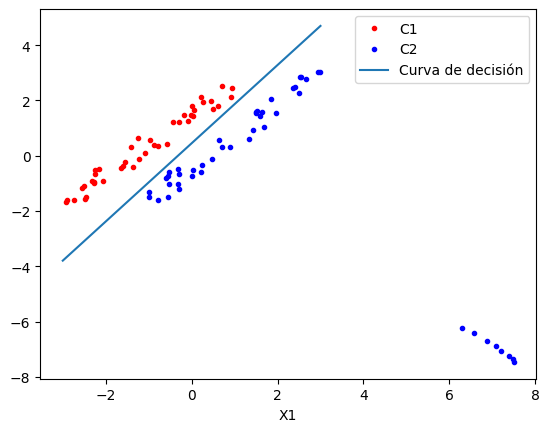

In [62]:
# Graficando datos

IndexClass1 = np.where(YTrain==1)
IndexClass2 = np.where(YTrain==-1)

# print(f"Index cuya clase es 1 \n{IndexClass1}")
# print(f"Index cuya clase es 2 \n{IndexClass2}")

Xclass1 = Train[["X1", "X2"]].iloc[IndexClass1]
Xclass2 = Train[["X1", "X2"]].iloc[IndexClass2]

# print(f"Atributos etiquetados como clase 1 \n{Xclass1}")
# print(f"Atributos etiquetados como clase 2 \n{Xclass2}")

plt.plot(Xclass1["X1"], Xclass1["X2"], ".r", label="C1")
plt.plot(Xclass2["X1"], Xclass2["X2"], ".b", label="C2")
plt.plot(X1, X2, label = "Curva de decisión")
plt.xlabel("X2")
plt.xlabel("X1")
plt.legend()